# Import Libiraries

In [1]:
!pip install opencv-contrib-python
!pip install matplotlib
!pip install numpy
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [1]:
!pip install --upgrade opencv-python opencv-contrib-python


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/45.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/45.3 MB ? eta -:--:--
   ---------------------------------------- 0.3/45.3 MB ? eta -:--:--
   ---------------------------------------- 0.3/45.3 MB ? eta -:--:--
   ---------------------------------------- 0.5/45.3 MB 730.2 kB/s eta 0:01:02
   ---------------------------------------- 0.5/45.3 MB 730.2 kB/s eta 0:01:02
    --------------------------------------- 0.8/45.3 MB 671.3 kB/s eta 0:01:07
    --------------------------------------- 1.0/45.3 MB 751.1 kB/s eta 0:00:59
    --------------------------------------- 1.0/45.3 MB 751.1 kB/s eta 0:00:59
    --------------------------------------- 1.0/45.3 MB 751.1 kB/s eta 0:00:59
   - -------------------------------------- 1.3/45.3 MB 684.9 kB/s eta 0:01:05
   - -------------------------------------- 1.6/45.3 MB 717.0 kB/s eta 0:01:01
   - ----------

In [ ]:
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25855 sha256=f70cec6820c3c34bc2f2a1bbb1785ec45716bcb5f8fa336e7eb90e1daed6db2a
  Stored in directory: C:\Users\Ali Othman\AppData\Local\Temp\pip-ephem-wheel-cache-nbqan4a9\wheels\31\d0\2c\87ce38f6052879e5b7b18f0f8b4a10ad2a9d210e908d449f16
Successfully built imutils


  DEPRECATION: Building 'imutils' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'imutils'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [ ]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt

# Read the images

In [50]:
img1 = cv2.imread('C:\Ali projects\Sadeem\Task_1\difference1.jpg')
img2 = cv2.imread('C:\Ali projects\Sadeem\Task_1\difference2.jpg')

In [51]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

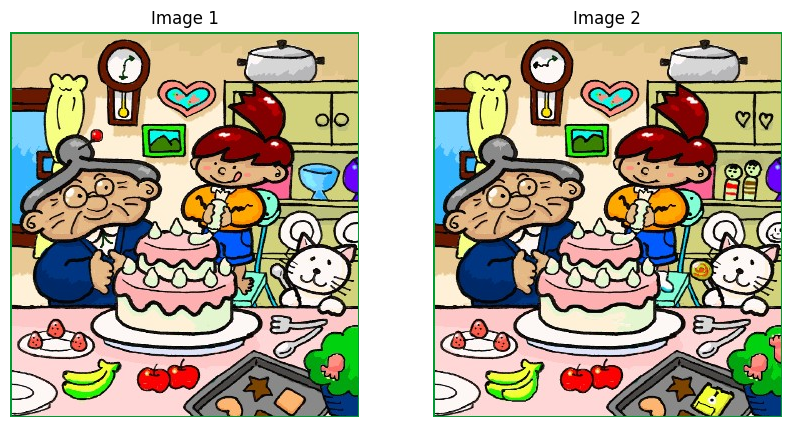

In [52]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title("Image 1")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title("Image 2")
plt.axis("off")

plt.show()

# Grayscale the images

In [53]:
# Grayscale the images
gray1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)  
gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

(np.float64(-0.5), np.float64(348.5), np.float64(384.5), np.float64(-0.5))

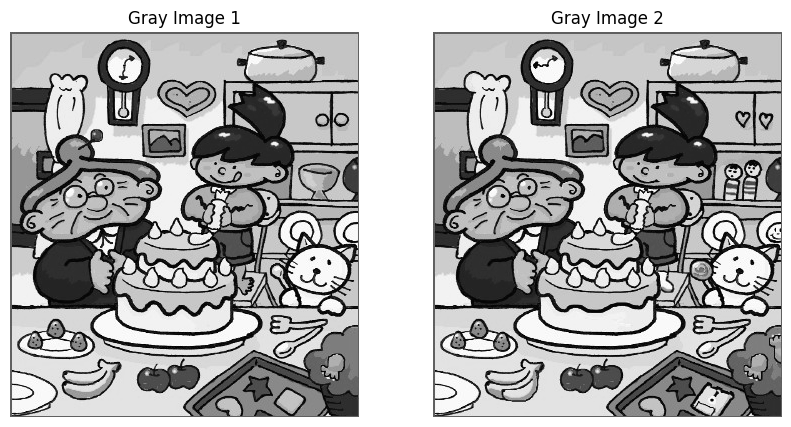

In [54]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(gray1, cmap='gray') 
plt.title("Gray Image 1")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(gray2, cmap='gray')
plt.title("Gray Image 2")
plt.axis("off")

# Finding the difference

In [55]:
# find the difference
diff = cv2.absdiff(gray1, gray2)
_, diff = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)

(np.float64(-0.5), np.float64(348.5), np.float64(384.5), np.float64(-0.5))

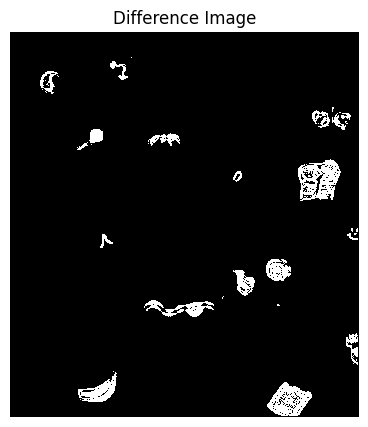

In [56]:
plt.figure(figsize=(5,5))
plt.imshow(diff, cmap='gray')
plt.title("Difference Image")
plt.axis("off")

In [57]:
# Dilation to enhance the differences
kernel = np.ones((5,5), np.uint8)
dilated_diff = cv2.dilate(diff, kernel, iterations=1)


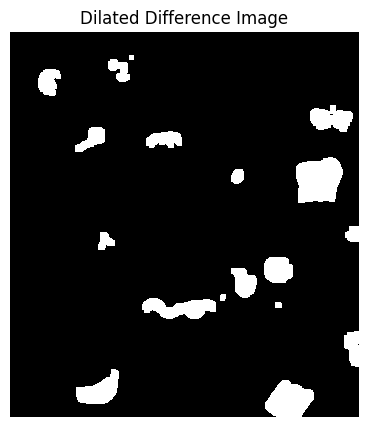

In [58]:
# show the dilated difference
plt.figure(figsize=(5,5))
plt.imshow(dilated_diff, cmap='gray')
plt.title("Dilated Difference Image")
plt.axis("off")
plt.show()

In [59]:
# finding contours
contours, _ = cv2.findContours(dilated_diff.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

Total differences found: 15


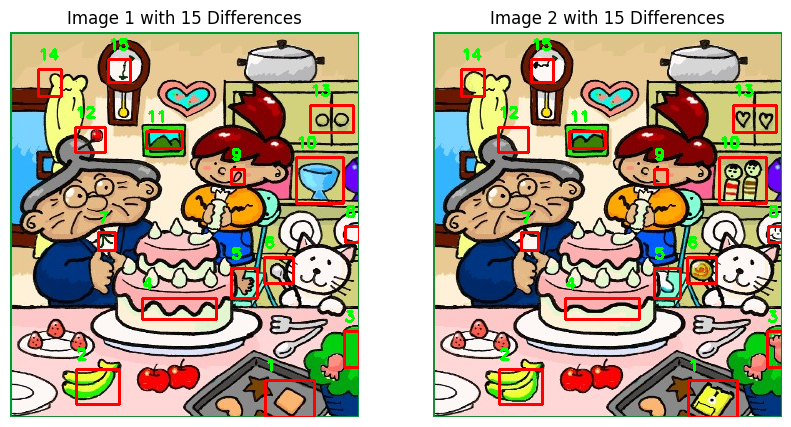

In [60]:
# loop over the contours and draw bounding boxes

# diff counter
difference_count = 0  

for contour in contours:
    if cv2.contourArea(contour) > 100:  # filter out small contours
        difference_count += 1  
        (x, y, w, h) = cv2.boundingRect(contour)
        
        
        cv2.rectangle(img1, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.rectangle(img2, (x, y), (x + w, y + h), (255, 0, 0), 2)
        
        # put text labels
        cv2.putText(img1, str(difference_count), (x, y-10), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        cv2.putText(img2, str(difference_count), (x, y-10), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

print(f"Total differences found: {difference_count}")  

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)    
plt.imshow(img1)
plt.title(f"Image 1 with {difference_count} Differences")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title(f"Image 2 with {difference_count} Differences")   
plt.axis("off")
plt.show()

In [61]:
# Export the result images
cv2.imwrite('C:/Ali projects/Sadeem/Task_1/detected_differences_image1.jpg', cv2.cvtColor(img1, cv2.COLOR_RGB2BGR))
cv2.imwrite('C:/Ali projects/Sadeem/Task_1/detected_differences_image2.jpg', cv2.cvtColor(img2, cv2.COLOR_RGB2BGR))

True